<a href="https://colab.research.google.com/github/SchmetterlingIII/seizure-modelling/blob/main/heterogeneity_and_brian2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session II
This section will now explore an existing approach to neural dynamics (using `Brian2`) which I will use to visualise the network dynamics and signal propagation.

More testing should be done in this phase of the code, rather than researching (which slows momentum).

### Intended Results
It helps to have clearer checklists to be working towards:
- Semi-detailed explanation of holistic goals so that this is clear (**for collaboration**), especially given intentions for open-sourcing this
    - have validation metrics in mind (helps with the writing of the paper)
- Basic implementation of `Brian2` (Izhikevich Model, Hodgkin-Huxley or just signals spreading in a network; look at tutorials)
- Coding heterogeneity within this network (using the classes within the module)
- Visualising this using `networkx` (and with different graph types)
- (only after completing this)

### Next session
*Long term goal for this, realistically, but good to just be aware of.*
- Trying to make code more modular for other additional modules to be added e.g. implementation of amyloid-$\beta$ within the neurotransmitters that affect the excitability of neurons (alongside glutamate and GABA).
- Reaching out to other researchers (and people) for how the interface can be improved to be more accessible.

## Brian2 Test
https://brian2.readthedocs.io/en/stable/:
I will read through the documentation to get a better understanding of this. Below will be the tests from reading through this.

In [2]:
pip install brian2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.6 MB/s eta 0:00:00


In [2]:
from brian2 import *
import numpy as np
%matplotlib inline

### Task 1: Single Neuron
For an intial test of the `Brian2` module, I will plot a single neuron spiking in response to a voltage reaching the action potential. I will also include a refractory period within this model.

*This is just following the tutorial.*

In [6]:
'''
Below will include the equations from the documentation; more extensive understanding of differential equations will take place.
'''

tau = 10*ms
# try to find (and validate) the differential equation that will form the basis of the model
eqs = '''
dv/dt = (1-v)/tau : 1
'''

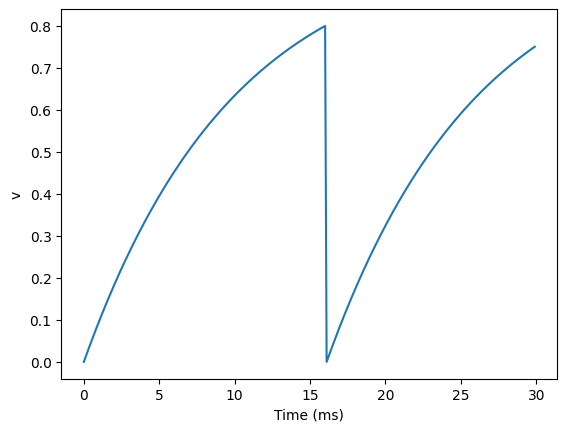

In [8]:
start_scope()
G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v=0', method='euler')
M = StateMonitor(G, 'v', record=True) # monitors the voltage from the 'G' group

run(30*ms)

plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

### Task 2: Multiple Neurons
I will now do this with 4 neurons (the code written such that I could have $n$ neurons) of the neurons responding to subtly different action potentials and refractory periods (the code making it inherently stochastic).

### Task 3: Networkx & Dependencies
Final project for this notebook is to, using both `Brian2` and `networkx`:
- have action potentials propagate through the neurons (developing some relation between them using the graphical )
- try to visualise these wrt time and have these steps update dynamically through exporting a `.gif` of a `matplotlib` animation within the file, alongside a static graph (*how can this dynamic system between the neurons be displayed graphically*)